In [1]:
%pylab inline

import numpy as np
import matplotlib.pyplot as plt

import theano
import theano.tensor as T
import lasagne
from math import *

Populating the interactive namespace from numpy and matplotlib
Couldn't import dot_parser, loading of dot files will not be possible.


Using gpu device 0: GeForce GTX880M (CNMeM is disabled, cuDNN 5103)
/usr/local/lib/python2.7/dist-packages/theano/sandbox/cuda/__init__.py:599: UserWarning: Your cuDNN version is more recent than the one Theano officially supports. If you see any problems, try updating Theano or downgrading cuDNN to version 5.
  warnings.warn(warn)


In [2]:

def sample(N):
    z1 = np.random.randint(3,size=N)
    z2 = np.random.randn(N,2)
    z3 = np.random.randint(2,size=N)+1
    
    x = np.array([(z3+0.2*z2[:,1])*(np.sin(2*3.14159*z1/3.0+0.2*z3 + z3*z2[:,0]*0.1)), (z3+0.2*z2[:,1])*(np.cos(2*3.14159*z1/3.0+0.2*z3 + z3*z2[:,0]*0.1))]).T
    y = 1.0/(1.0+np.exp(-1.5*x))
    return y

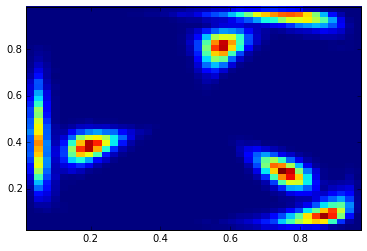

In [3]:
data = sample(100000)
plt.hist2d(data[:,0],data[:,1],40)
plt.show()

In [4]:
invar = T.matrix()

TEMP = 0.4
TEMP2 = 0.0
HIDDEN = 256

input = lasagne.layers.InputLayer((None,2),invar)
p1_dense1 = lasagne.layers.DenseLayer(input, num_units = HIDDEN)
p1_dense2 = lasagne.layers.DenseLayer(p1_dense1, num_units = HIDDEN, nonlinearity = lasagne.nonlinearities.sigmoid)
p1_noisify = lasagne.layers.GaussianNoiseLayer(p1_dense2, sigma = TEMP)
p1_dense3 = lasagne.layers.DenseLayer(p1_noisify, num_units = HIDDEN)
p1_out = lasagne.layers.DenseLayer(p1_dense3, num_units=2, nonlinearity = lasagne.nonlinearities.sigmoid)
p1_outnoise = lasagne.layers.GaussianNoiseLayer(p1_out, sigma = TEMP2)

# Now repeat...
p2_dense1 = lasagne.layers.DenseLayer(p1_outnoise, num_units = HIDDEN, W=p1_dense1.W, b=p1_dense1.b)
p2_dense2 = lasagne.layers.DenseLayer(p2_dense1, num_units = HIDDEN, W=p1_dense2.W, b=p1_dense2.b, nonlinearity = lasagne.nonlinearities.sigmoid)
p2_noisify = lasagne.layers.GaussianNoiseLayer(p2_dense2, sigma = TEMP)
p2_dense3 = lasagne.layers.DenseLayer(p2_noisify, num_units = HIDDEN, W=p1_dense3.W, b=p1_dense3.b)
p2_out = lasagne.layers.DenseLayer(p2_dense3, num_units=2, nonlinearity = lasagne.nonlinearities.sigmoid, W=p1_out.W, b=p1_out.b)
p2_outnoise = lasagne.layers.GaussianNoiseLayer(p2_out, sigma = TEMP2)

# Now repeat...
p3_dense1 = lasagne.layers.DenseLayer(p2_outnoise, num_units = HIDDEN, W=p1_dense1.W, b=p1_dense1.b)
p3_dense2 = lasagne.layers.DenseLayer(p3_dense1, num_units = HIDDEN, W=p1_dense2.W, b=p1_dense2.b, nonlinearity = lasagne.nonlinearities.sigmoid)
p3_noisify = lasagne.layers.GaussianNoiseLayer(p3_dense2, sigma = TEMP)
p3_dense3 = lasagne.layers.DenseLayer(p3_noisify, num_units = HIDDEN, W=p1_dense3.W, b=p1_dense3.b)
p3_out = lasagne.layers.DenseLayer(p3_dense3, num_units=2, nonlinearity = lasagne.nonlinearities.sigmoid, W=p1_out.W, b=p1_out.b)
p3_outnoise = lasagne.layers.GaussianNoiseLayer(p3_out, sigma = TEMP2)

# Now repeat...
p4_dense1 = lasagne.layers.DenseLayer(p3_outnoise, num_units = HIDDEN, W=p1_dense1.W, b=p1_dense1.b)
p4_dense2 = lasagne.layers.DenseLayer(p4_dense1, num_units = HIDDEN, W=p1_dense2.W, b=p1_dense2.b, nonlinearity = lasagne.nonlinearities.sigmoid)
p4_noisify = lasagne.layers.GaussianNoiseLayer(p4_dense2, sigma = TEMP)
p4_dense3 = lasagne.layers.DenseLayer(p4_noisify, num_units = HIDDEN, W=p1_dense3.W, b=p1_dense3.b)
p4_out = lasagne.layers.DenseLayer(p4_dense3, num_units=2, nonlinearity = lasagne.nonlinearities.sigmoid, W=p1_out.W, b=p1_out.b)
p4_outnoise = lasagne.layers.GaussianNoiseLayer(p4_out, sigma = TEMP2)

# Now repeat...
p5_dense1 = lasagne.layers.DenseLayer(p4_outnoise, num_units = HIDDEN, W=p1_dense1.W, b=p1_dense1.b)
p5_dense2 = lasagne.layers.DenseLayer(p5_dense1, num_units = HIDDEN, W=p1_dense2.W, b=p1_dense2.b, nonlinearity = lasagne.nonlinearities.sigmoid)
p5_noisify = lasagne.layers.GaussianNoiseLayer(p5_dense2, sigma = TEMP)
p5_dense3 = lasagne.layers.DenseLayer(p5_noisify, num_units = HIDDEN, W=p1_dense3.W, b=p1_dense3.b)
p5_out = lasagne.layers.DenseLayer(p5_dense3, num_units=2, nonlinearity = lasagne.nonlinearities.sigmoid, W=p1_out.W, b=p1_out.b)
p5_outnoise = lasagne.layers.GaussianNoiseLayer(p5_out, sigma = TEMP2)

# Now repeat...
p6_dense1 = lasagne.layers.DenseLayer(p5_outnoise, num_units = HIDDEN, W=p1_dense1.W, b=p1_dense1.b)
p6_dense2 = lasagne.layers.DenseLayer(p6_dense1, num_units = HIDDEN, W=p1_dense2.W, b=p1_dense2.b, nonlinearity = lasagne.nonlinearities.sigmoid)
p6_noisify = lasagne.layers.GaussianNoiseLayer(p6_dense2, sigma = TEMP)
p6_dense3 = lasagne.layers.DenseLayer(p6_noisify, num_units = HIDDEN, W=p1_dense3.W, b=p1_dense3.b)
p6_out = lasagne.layers.DenseLayer(p6_dense3, num_units=2, nonlinearity = lasagne.nonlinearities.sigmoid, W=p1_out.W, b=p1_out.b)
p6_outnoise = lasagne.layers.GaussianNoiseLayer(p6_out, sigma = TEMP2)

# Now repeat...
p7_dense1 = lasagne.layers.DenseLayer(p6_outnoise, num_units = HIDDEN, W=p1_dense1.W, b=p1_dense1.b)
p7_dense2 = lasagne.layers.DenseLayer(p7_dense1, num_units = HIDDEN, W=p1_dense2.W, b=p1_dense2.b, nonlinearity = lasagne.nonlinearities.sigmoid)
p7_noisify = lasagne.layers.GaussianNoiseLayer(p7_dense2, sigma = TEMP)
p7_dense3 = lasagne.layers.DenseLayer(p7_noisify, num_units = HIDDEN, W=p1_dense3.W, b=p1_dense3.b)
p7_out = lasagne.layers.DenseLayer(p7_dense3, num_units=2, nonlinearity = lasagne.nonlinearities.sigmoid, W=p1_out.W, b=p1_out.b)

out1,out2,out3,out4,out5,out6,out7 = lasagne.layers.get_output([p1_out,p2_out,p3_out,p4_out,p5_out,p6_out,p7_out])

loss = T.mean( (out1-invar)**2 + (out2-invar)**2 + (out3-invar)**2 + (out4-invar)**2 + (out5-invar)**2 + (out6-invar)**2 + (out7-invar)**2)
params = lasagne.layers.get_all_params(p7_out,trainable=True)
updates = lasagne.updates.adam(loss,params,learning_rate = 1e-3)

train = theano.function([invar], loss, updates=updates, allow_input_downcast = True)
project = theano.function([invar], out7, allow_input_downcast = True)

In [5]:
#data = sample(1000)

for epoch in range(10000):
    data = sample(1000)
    err = train(data)
    if epoch%100 == 0:
        print err

0.797172904015
0.376685261726
0.330215841532
0.0788879096508
0.0630481690168
0.0597122460604
0.0560206323862
0.0497223995626
0.0474856905639
0.047755997628
0.0415515452623
0.0433428660035
0.0338953062892
0.0355174131691
0.0318645462394
0.0319139994681
0.0274570751935
0.0296505186707
0.0262829530984
0.0260078329593
0.0264870841056
0.0237705167383
0.0237536150962
0.0257007870823
0.0232343785465
0.0219830330461
0.0220802780241
0.0233245864511
0.0196057856083
0.0213776249439
0.0200257394463
0.0185995455831
0.019552256912
0.0197945032269
0.0174520798028
0.0189339984208
0.0176494531333
0.0173293892294
0.0166314132512
0.0152208674699
0.0161750726402
0.0162981338799
0.0142134828493
0.014818216674
0.0138083994389
0.0154497595504
0.0140280453488
0.0159476976842
0.0132405646145
0.0123723652214
0.0126754622906
0.0122866230085
0.0114721413702
0.0120979528874
0.0133304968476
0.0122421383858
0.0105509553105
0.0100729474798
0.0103964926675
0.00956105999649
0.0107394456863
0.0101858833805
0.01126598473

In [6]:
fakes = np.random.rand(100000,2)
pfakes = project(fakes)
for i in range(10):
    pfakes = project(pfakes)

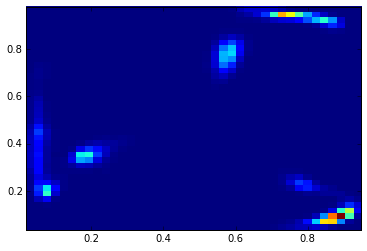

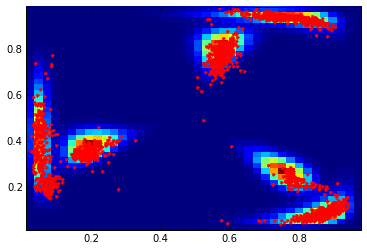

In [7]:
plt.hist2d(pfakes[:,0],pfakes[:,1],40)
plt.show()
data = sample(1000000)
plt.hist2d(data[:,0],data[:,1],40)
plt.plot(pfakes[::50,0],pfakes[::50,1],'r.')
plt.show()